In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [18]:
def rgb2gray(rgb):
    r, g, b = rgb[0,:,:], rgb[1,:,:], rgb[2,:,:]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return np.array([gray])

In [19]:
def detect_vertical_edges(image):
    #solution
    vertical_filter = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    rows,cols = image.shape
    single_channel_image = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            single_channel_image[i][j] = image[i][j]
            
    #print(single_channel_image)        
    
    def convolution(k, data):
        n,m = data.shape
        img_new = []
        for i in range(n-3):
            line = []
            for j in range(m-3):
                a = data[i:i+3,j:j+3]
                line.append(np.sum(np.multiply(k, a)))
            img_new.append(line)
        return np.array(img_new) 

    filtered_image = convolution(vertical_filter,single_channel_image)            
    #end_solution

    return filtered_image

def detect_horizontal_edges(image):
    #solution
    vertical_filter = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    rows,cols = image.shape
    single_channel_image = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            single_channel_image[i][j] = image[i][j]
            
    #print(single_channel_image)        
    
    def convolution(k, data):
        n,m = data.shape
        img_new = []
        for i in range(n-3):
            line = []
            for j in range(m-3):
                a = data[i:i+3,j:j+3]
                line.append(np.sum(np.multiply(k, a)))
            img_new.append(line)
        return np.array(img_new) 

    filtered_image = convolution(vertical_filter,single_channel_image)            
    #end_solution

    return filtered_image    

(128, 128)


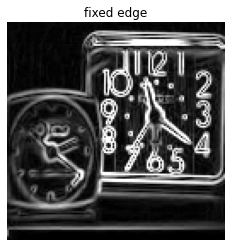

In [20]:
fname_us_path = "C:\\Users\\Leo\\Desktop\\FinalYearProject\\Dataf\\uhr1.jpg"
img_pil = Image.open(fname_us_path)
img_np = np.asarray(img_pil)

one_vertical = detect_vertical_edges(img_np)
one_horizontal = detect_horizontal_edges(img_np)

image_1_vertical = Image.fromarray(one_vertical)
image_1_vertical = image_1_vertical.resize((128,128),Image.ANTIALIAS)
one_vertical = np.asarray(image_1_vertical)

image_1_horizontal = Image.fromarray(one_horizontal)
image_1_horizontal = image_1_horizontal.resize((128,128),Image.ANTIALIAS)
one_horizontal = np.asarray(image_1_horizontal)

one_mixed_array = np.sqrt(np.square(image_1_vertical)+np.square(image_1_horizontal))
one_mixed_edge = Image.fromarray(one_mixed_array)
# mixed_edge = mixed_edge.resize((509,509),Image.ANTIALIAS)
print(one_mixed_array.shape)
plt.imshow(one_mixed_edge)
plt.axis('off')
plt.title('fixed edge')
plt.show()


(159, 159)
(128, 128)


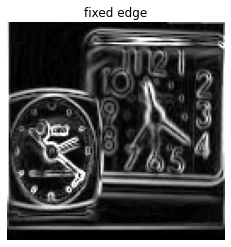

In [21]:
fname_mr_path = "C:\\Users\\Leo\\Desktop\\FinalYearProject\\Dataf\\uhr2.jpg"
img_pil = Image.open(fname_mr_path)
img_np = np.asarray(img_pil)
print(img_np.shape)

two_vertical = detect_vertical_edges(img_np)
two_horizontal = detect_horizontal_edges(img_np)


image_2_vertical = Image.fromarray(two_vertical)
image_2_vertical = image_2_vertical.resize((128,128),Image.ANTIALIAS)
two_vertical = np.asarray(image_2_vertical)

image_2_horizontal = Image.fromarray(two_horizontal)
image_2_horizontal = image_2_horizontal.resize((128,128),Image.ANTIALIAS)
two_horizontal = np.asarray(image_2_horizontal)

two_mixed_array = np.sqrt(np.square(image_2_vertical)+np.square(image_2_horizontal))
two_mixed_edge = Image.fromarray(two_mixed_array)

print(two_mixed_array.shape)
plt.imshow(two_mixed_edge)
plt.axis('off')
plt.title('fixed edge')
plt.show()

In [22]:
total_mixed = one_mixed_array+two_mixed_array
print(total_mixed.shape)
sum = 0
for i in range(128):
    for j in range(128):
        sum += total_mixed[i][j]
print(sum)        

(128, 128)
1945870.8425513273


(125, 125)


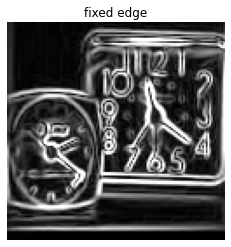

In [23]:
fname_fusion_path = "C:\\Users\\Leo\\Desktop\\FinalYearProject\\DD_remote_fusion_outfocus.jpg"
img_pil = Image.open(fname_fusion_path)
img_np = np.asarray(img_pil)
single_channel_fusd_image = np.zeros(shape=(128,128))
for i in range(128):
    for j in range(128):
        single_channel_fusd_image[i][j] = img_np[i][j][0]


fusion_vertical = detect_vertical_edges(single_channel_fusd_image)
fusion_horizontal = detect_horizontal_edges(single_channel_fusd_image)


fil_image_2 = Image.fromarray(fusion_vertical)


fil_image = Image.fromarray(fusion_horizontal)


mixed_array_fusion = np.sqrt(np.square(fil_image)+np.square(fil_image_2))
print(mixed_array_fusion.shape)
mixed_edge_fusion = Image.fromarray(mixed_array_fusion)

plt.imshow(mixed_edge_fusion)
plt.axis('off')
plt.title('fixed edge')
plt.show()

In [24]:
def find_alpha_xy(mixed_array,vertical_array,horizontal_array):
    height = len(mixed_array)
    length = len(mixed_array[0])
    single_channel_image = np.zeros((height,length))
    for i in range(height):
        for j in range(length):
            single_channel_image[i][j] = math.atan(np.square(vertical_array[i][j])/np.square(horizontal_array[i][j]))

    return single_channel_image

    
A_alpha_xy = find_alpha_xy(one_mixed_array,one_vertical,one_horizontal)*255
B_alpha_xy = find_alpha_xy(two_mixed_array,two_vertical,two_horizontal)*255
F_alpha_xy = find_alpha_xy(mixed_array_fusion,fusion_vertical,fusion_horizontal)*255


C:\Users\Leo\AppData\Local\Temp/ipykernel_11708/4290142856.py:7: RuntimeWarning: invalid value encountered in float_scalars
  single_channel_image[i][j] = math.atan(np.square(vertical_array[i][j])/np.square(horizontal_array[i][j]))
C:\Users\Leo\AppData\Local\Temp/ipykernel_11708/4290142856.py:7: RuntimeWarning: divide by zero encountered in float_scalars
  single_channel_image[i][j] = math.atan(np.square(vertical_array[i][j])/np.square(horizontal_array[i][j]))
C:\Users\Leo\AppData\Local\Temp/ipykernel_11708/4290142856.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  single_channel_image[i][j] = math.atan(np.square(vertical_array[i][j])/np.square(horizontal_array[i][j]))
C:\Users\Leo\AppData\Local\Temp/ipykernel_11708/4290142856.py:7: RuntimeWarning: invalid value encountered in double_scalars
  single_channel_image[i][j] = math.atan(np.square(vertical_array[i][j])/np.square(horizontal_array[i][j]))


In [25]:
def Q_xy(g_single_input,g_fusion,alpha_single_input,alpha_fusion):
    G_xy=0
    if(g_single_input>g_fusion):
        G_xy = g_fusion/g_single_input
    else:
        G_xy = g_single_input/g_fusion 

    # print("this is G_XY")
    # print(G_xy)       

    Delta_xy = 1-((2*abs(alpha_single_input-alpha_fusion))/math.pi)  
    # print("this is Delta_xy")
    # print(Delta_xy) 

    Q_g_xy = 1/(1+math.e**((-10)*(G_xy+0.5))) 
    # print("this is Q_g_xy")
    # print(Q_g_xy)

    Q_alpha_xy = 1/(1+math.e**((-20)*(Delta_xy+0.75))) 
    # print("this is Q_alpha_xy")
    # print(Q_alpha_xy)


    # print("this is result")
    # print(Q_g_xy * Q_alpha_xy)
    return Q_g_xy * Q_alpha_xy


In [26]:
count = 0
final_sum = 0
for i in range(0,120,10):
    for j in range(0,120,10):
        sub_down_sum = 0
        sub_above_sum = 0
        for a in range(i,i+10):
            for b in range(j,j+10):
                sub_down_sum += total_mixed[a][b]
                sub_above_sum += Q_xy(one_mixed_array[a][b],mixed_array_fusion[a][b],A_alpha_xy[a][b],F_alpha_xy[a][b])*one_mixed_array[a][b] + Q_xy(two_mixed_array[a][b],mixed_array_fusion[a][b],B_alpha_xy[a][b],F_alpha_xy[a][b])*two_mixed_array[a][b]
        value = sub_above_sum/sub_down_sum
        if(math.isnan(value)):
            continue
        else:
            final_sum+=value
        count+=1    

print(final_sum)
print(count)        


29.850137800591515
130


C:\Users\Leo\AppData\Local\Temp/ipykernel_11708/975380302.py:19: RuntimeWarning: overflow encountered in double_scalars
  Q_alpha_xy = 1/(1+math.e**((-20)*(Delta_xy+0.75)))


In [27]:
print(final_sum/count)

0.22961644461993472
